In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr
import scipy.constants as c

In [55]:
def Regresion(x, y, f, beta0):
    model = odr.Model(f)
    data = odr.RealData(x, y)
    myodr = odr.ODR(data, model, beta0)
    out = myodr.run()
    popt = out.beta
    perr = out.sd_beta
    x_fit = np.linspace(min(x), max(x), 5000)
    fit = f(popt, x_fit)
    return popt, perr, x_fit, fit


In [56]:
def MinimosCuadrados(puntosx, puntosy):
    n = len(puntosx)
    graf = []
    valor_x = np.linspace(np.amin(puntosx), np.amax(puntosx), 1000) 
    a1 = (n*sum(np.multiply(puntosx, puntosy)) - sum(puntosx)*sum(puntosy))/(n*sum(np.power(puntosx, 2)) - (sum(puntosx))**2)
    a0 = np.mean(puntosy) - a1*np.mean(puntosx)
    r1 = n*sum(np.multiply(puntosx, puntosy)) - sum(puntosx)*sum(puntosy)
    r2 = np.sqrt(n*sum(np.power(puntosx, 2)) - sum(puntosx)**2)*np.sqrt(n*sum(np.power(puntosy, 2)) - sum(puntosy)**2)
    r = r1/r2
    for x in valor_x:
        y = a0 + a1*x
        graf.append(y)
    return r**2

In [57]:
def FuncionPrueba(B, x):
    return B[0] + B[1]*x + B[2]*x**2


In [58]:
def FuncionPrueba1(B, x):
    return B[0] + B[1]/x**B[2]


In [59]:
def Funcion2(B, x):
    return B[0]/x**B[1]


In [60]:
def Funcion3(B, x):
    return B[0] + B[1]*x


In [61]:
def Funcion4(B, x):
    return B[0] + B[1]*x


In [62]:
def IncertidumbreSuma(Ival):
    y = 0
    for i in range(len(Ival)):
        y += Ival[i]**2
    return np.sqrt(y)


In [63]:
def IncertidumbreMul(val, Ival, exp):
    y1, y2 = 1, 0
    for i in range(len(val)):
        y1 *= val[i]
        y2 += (exp[i]*Ival[i]/val[i])**2
    return y1*np.sqrt(y2)


In [64]:
def IncertidumbreDiv(val, Ival, exp):
    y2 = 0
    for i in range(len(val)):
        y2 += (exp[i]*Ival[i]/val[i])**2
    return val[0]/val[1]*np.sqrt(y2)

In [65]:
Data_exp1 = np.loadtxt('Datos.txt', skiprows = 12, max_rows = 4, usecols = (1, 2, 3, 4)).T
Data_exp2_1 = np.loadtxt('Datos.txt', skiprows = 30, max_rows = 10).T
Data_exp2_2 = np.loadtxt('Datos.txt', skiprows = 42, max_rows = 29).T
Data_exp3 = np.loadtxt('Datos.txt', skiprows = 81, max_rows = 10).T
Data_exp4 = np.loadtxt('Datos.txt', skiprows = 98, max_rows = 36).T


In [66]:
Medidas = np.zeros((len(Data_exp1), len(Data_exp1)))
Medias = np.zeros((len(Data_exp1), 2))


In [67]:
for i in range(len(Data_exp1)):
    for j in range(len(Data_exp1)):
        Medidas[i][j] = Data_exp1[i][j]/Data_exp1[i][0]


In [68]:
for i in range(len(Data_exp1)):
    Medias[i][0] = np.mean(Medidas.T[i])
    Medias[i][1] = np.std(Medidas.T[i])


In [69]:
print('EXP 1')
print('Medidas relativas')
print(Medidas)
print('Medias con sus incertidumbres')
print(Medias)


EXP 1
Medidas relativas
[[1.         0.97435897 0.12820513 0.02564103]
 [1.         0.8852459  0.14754098 0.08196721]
 [1.         0.96261682 0.14953271 0.08411215]
 [1.         0.94482759 0.13103448 0.05517241]]
Medias con sus incertidumbres
[[1.         0.        ]
 [0.94176232 0.03428175]
 [0.13907833 0.0095373 ]
 [0.0617232  0.02374827]]


In [70]:
print('')
print('EXP 2')
Data_exp2_prueba = np.loadtxt('Datos.txt', skiprows = 55, max_rows = 16).T
Rad_prom = np.mean(Data_exp2_1[1])
exp2, I_exp2, fitx2, fity2 = Regresion(Data_exp2_2[0]/100, Data_exp2_2[1] - Rad_prom, Funcion2, [1, 2])
exp21, I_exp21, fitx21, fity21 = Regresion(1/((Data_exp2_prueba[0]/100)**2), Data_exp2_prueba[1] - Rad_prom, Funcion3, [1, 1])
r2_2 = MinimosCuadrados(1/((Data_exp2_prueba[0]/100)**2), Data_exp2_prueba[1] - Rad_prom)



EXP 2


/tmp/ipykernel_54811/1778448122.py:2: RuntimeWarning: invalid value encountered in power
  return B[0]/x**B[1]


In [71]:
print(f'Radiacion promedio del ambiente: {Rad_prom}')
print('Curva para la ley de inversos cuadrados')
print(f'a0 = {exp2[0]} +/- {I_exp2[0]}')
print(f'a1 = {exp2[1]} +/- {I_exp2[1]}')
print(f'r^2 = 0.987')
print('Recta para la ley de inversos cuadrados')
print(f'a0 = {exp21[0]} +/- {I_exp21[0]}')
print(f'a1 = {exp21[1]} +/- {I_exp21[1]}')
print(f'r^2 = {r2_2}')

Radiacion promedio del ambiente: 0.125
Curva para la ley de inversos cuadrados
a0 = 0.04050968268569518 +/- 0.02187067774603963
a1 = 1.9775631171878991 +/- 0.4294730139788996
r^2 = 0.987
Recta para la ley de inversos cuadrados
a0 = -0.2799807369979407 +/- 0.02042043641826246
a1 = 0.0677233192202084 +/- 0.0012654021639170994
r^2 = 0.9958278246141449


In [72]:
print('')
print('EXP 3')
I_Res = np.zeros(len(Data_exp3[0]))
I_Res_rel = np.zeros(len(Data_exp3[0]))


EXP 3


In [73]:
for i in range(len(Data_exp3[0])):
    I_Res[i] = IncertidumbreDiv([Data_exp3[0][i], Data_exp3[1][i]], [0.01, 0.01], [1, 1])
Res_Amb, I_Res_Amb = 0.6, 0.01
Res = Data_exp3[0]/Data_exp3[1]

In [74]:
for i in range(len(Data_exp3[0])):
    I_Res_rel[i] = IncertidumbreDiv([Res[i], Res_Amb], [I_Res[i], I_Res_Amb], [1, 1])
Res_rel = Res/Res_Amb
R = np.array([1.0, 1.43, 1.87, 2.34, 2.85, 3.36, 3.88, 4.41, 4.95, 5.48, 6.03, 6.58, 7.14, 7.71, 8.28, 8.86, 9.44, 10.03])
T = np.array([300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])
T_prueba = np.array([1701.47003348, 1796.16856756, 1887.47150532, 1967.74881812])
Rad_prueba = np.array([6.7, 8.4, 10.1, 12.0])
exp_p, I_exp_p, fitx_p, fity_p = Regresion(R, T, FuncionPrueba, [1, 1, 1])


In [75]:
def f(x):
    return exp_p[0] + exp_p[1]*x + exp_p[2]*x**2


In [76]:
T3 = f(Res_rel)
exp3, I_exp3, fitx3, fity3 = Regresion(np.log(T3), np.log(Data_exp3[2]), Funcion3, [1, 4])
exp3_d, I_exp3_d, fitx3_d, fity3_d = Regresion(np.log(T_prueba), np.log(Rad_prueba), Funcion3, [1, 4])
r3_1 = MinimosCuadrados(np.log(T3), np.log(Data_exp3[2]))
r3_2 = MinimosCuadrados(np.log(T_prueba), np.log(Rad_prueba))
print('Resistencias del filamento')
print(Res)
print('Incertidumbres de las resistencias del filamento')
print(I_Res)
print('Resistencias relativas para la data')
print(Res_rel)
print('Incertidumbres de las resistencias relativas para la data')
print(I_Res_rel)
print('Temperaturas')
print(T3)
print('Temperaturas a la cuarta')
print(T3**4)
print('Curva Ley SB altas T (todos los datos)')
print(f'a0 = {exp3[0]} +/- {I_exp3[0]}')
print(f'a1 = {exp3[1]} +/- {I_exp3[1]}')
print(f'r^2 = {r3_1}')
print('Curva Ley SB altas T (ultimos datos)')
print(f'a0 = {exp3_d[0]} +/- {I_exp3_d[0]}')
print(f'a1 = {exp3_d[1]} +/- {I_exp3_d[1]}')
print(f'r^2 = {r3_2}')


Resistencias del filamento
[3.22580645 3.77358491 4.20168067 4.61538462 4.96453901 5.29801325
 5.625      5.91715976]
Incertidumbres de las resistencias del filamento
[0.03631453 0.03682865 0.03629447 0.03632673 0.03591668 0.03570571
 0.03570748 0.03550926]
Resistencias relativas para la data
[5.37634409 6.28930818 7.00280112 7.69230769 8.27423168 8.83002208
 9.375      9.86193294]
Incertidumbres de las resistencias relativas para la data
[0.10813126 0.12147118 0.13145775 0.14178222 0.15033573 0.15874356
 0.16719987 0.17469561]
Temperaturas
[1181.79776095 1350.20999742 1478.8214822  1600.60443974 1701.4700357
 1796.16856672 1887.47150078 1967.74880968]
Temperaturas a la cuarta
[1.95061990e+12 3.32357342e+12 4.78258837e+12 6.56350875e+12
 8.38102663e+12 1.04085053e+13 1.26917530e+13 1.49926580e+13]
Curva Ley SB altas T (todos los datos)
a0 = -30.53187825304622 +/- 0.4366534543848906
a1 = 4.357118881541876 +/- 0.059172411417621223
r^2 = 0.9988945019803607
Curva Ley SB altas T (ultimos da

In [77]:
print('')
print('EXP 4')

T1 = np.array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])
R1 = np.array([95.447, 91.126, 87.022, 83.124, 79.422, 75.903, 72.560, 69.380, 66.356, 63.480, 60.743, 58.138, 55.658, 53.297, 51.048, 48.905, 46.863, 44.917, 43.062,41.292, 39.605, 37.995, 36.458, 34.991, 33.591, 32.253, 30.976, 29.756, 28.590, 27.475, 26.409, 25.390, 24.415, 23.483, 22.590, 21.736, 20.919, 20.136, 19.386, 18.668, 17.980, 17.321, 16.689, 16.083, 15.502, 14.945, 14.410, 13.897, 13.405, 12.932, 12.479, 12.043, 11.625, 11.223, 10.837, 10.467, 10.110, 9.7672, 9.4377, 9.1208, 8.8160, 8.5227, 8.2406, 7.9691, 7.7077, 7.4562, 7.2140, 6.9806, 6.7559, 6.5394, 6.3308, 6.1298, 5.9361, 5.7493, 5.5693, 5.3956, 5.2281, 5.0666, 4.9107, 4.7603, 4.6151, 4.4750, 4.3397, 4.2091, 4.0829, 3.9611, 3.8434, 3.7297, 3.6198, 3.5136, 3.4110, 3.3118, 3.2158, 3.1230, 3.0333, 2.9465, 2.8625, 2.7813, 2.7027, 2.6266, 2.5530, 2.4817, 2.4126, 2.3458])
exp_p1, I_exp_p1, fitx_p1, fity_p1 = Regresion(R1, T1, FuncionPrueba1, [-100, 300, .1])


EXP 4


In [78]:
def f1(x):
    return exp_p1[0] + exp_p1[1]/x**exp_p1[2]
print(exp_p1)


[-1.32125198e+02  2.92674582e+02  1.35005384e-01]


In [79]:
Tamb = 24 + 273
Ramb = 87.2
Tk = f1(Data_exp4[0]) + 273
exp4, I_exp4, fitx4, fity4 = Regresion(Tk**4 - Tamb**4, Data_exp4[1], Funcion4, [1, 1])
r4 = MinimosCuadrados(Tk**4 - Tamb**4, Data_exp4[1])

print('Temperaturas a partir de R')
print(Tk)
print('Diferencia de temperaturas a la cuarta')
print(Tk**4 - Tamb**4)
print('Curva Ley SB bajas T')
print(f'a0 = {exp4[0]} +/- {I_exp4[0]}')
print(f'a1 = {exp4[1]} +/- {I_exp4[1]}')
print(f'r^2 = {r4}')


Temperaturas a partir de R
[309.49682124 309.45853309 309.42031792 309.38217545 309.34410543
 309.30610759 309.26818169 309.23032747 309.19254466 309.15483302
 309.1171923  309.07962225 309.04212261 309.00469315 308.9673336
 308.93004373 308.8928233  308.85567205 308.81858976 308.78157617
 308.74463105 308.70775417 308.67094528 308.63420415 308.59753054
 308.56092422 308.52438497 308.48791255 308.45150672 308.41516727
 308.37889396 308.34268657 308.30654488 308.27046865 308.23445767
 308.19851171]
Diferencia de temperaturas a la cuarta
[1.39456736e+09 1.39002781e+09 1.38549860e+09 1.38097967e+09
 1.37647100e+09 1.37197254e+09 1.36748424e+09 1.36300607e+09
 1.35853799e+09 1.35407996e+09 1.34963194e+09 1.34519389e+09
 1.34076578e+09 1.33634755e+09 1.33193918e+09 1.32754063e+09
 1.32315185e+09 1.31877282e+09 1.31440348e+09 1.31004382e+09
 1.30569378e+09 1.30135333e+09 1.29702243e+09 1.29270105e+09
 1.28838916e+09 1.28408671e+09 1.27979366e+09 1.27550999e+09
 1.27123566e+09 1.26697063e+09 

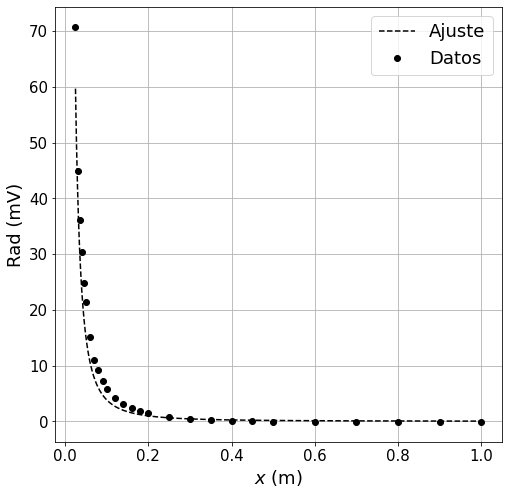

In [80]:
plt.figure(figsize = (8, 8))
plt.plot(fitx2, fity2, 'k--')
plt.plot(Data_exp2_2[0]/100, Data_exp2_2[1] - Rad_prom, 'ko')
plt.xlabel(r'$x$ (m)', fontsize = 18)
plt.ylabel(r'Rad (mV)', fontsize = 18)
plt.legend(['Ajuste', 'Datos'], fontsize = 18)
plt.tick_params(labelsize = 15)
plt.grid()

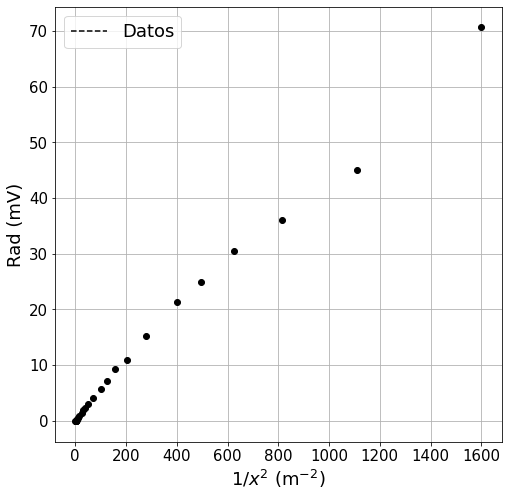

In [88]:
plt.figure(figsize = (8, 8))
plt.plot(fitx21, fity21, 'k--')
plt.plot(1/((Data_exp2_2[0]/100)**2), Data_exp2_2[1] - Rad_prom, 'ko')
plt.xlabel(r'$1/x^2$ (m$^{-2}$)', fontsize = 18)
plt.ylabel(r'Rad (mV)', fontsize = 18)
plt.legend(['Datos'], fontsize = 18)
plt.tick_params(labelsize = 15)
plt.grid()


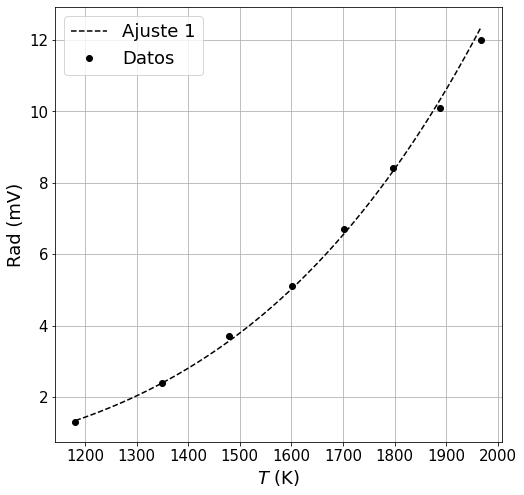

In [82]:
plt.figure(figsize = (8, 8))
plt.plot(np.exp(fitx3), np.exp(fity3), 'k--')
plt.plot((T3), (Data_exp3[2]), 'ko')
plt.xlabel(r'$T$ (K)', fontsize = 18)
plt.ylabel(r'Rad (mV)', fontsize = 18)
plt.legend(['Ajuste 1', 'Datos'], fontsize = 18)
plt.tick_params(labelsize = 15)
plt.grid()


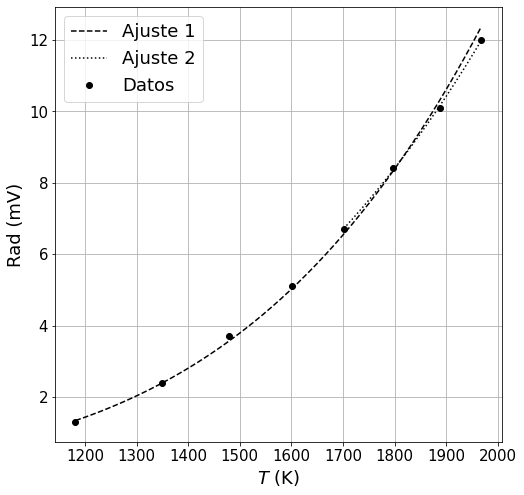

In [83]:
plt.figure(figsize = (8, 8))
plt.plot(np.exp(fitx3), np.exp(fity3), 'k--')
plt.plot(np.exp(fitx3_d), np.exp(fity3_d), 'k:')
plt.plot((T3), (Data_exp3[2]), 'ko')
plt.xlabel(r'$T$ (K)', fontsize = 18)
plt.ylabel(r'Rad (mV)', fontsize = 18)
plt.legend(['Ajuste 1', 'Ajuste 2', 'Datos'], fontsize = 18)
plt.tick_params(labelsize = 15)
plt.grid()


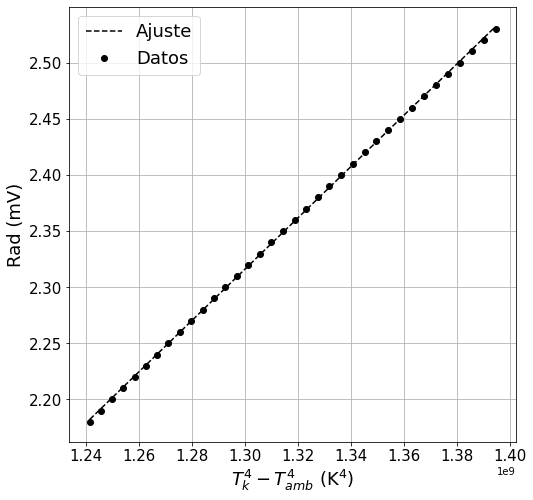

In [84]:
plt.figure(figsize = (8, 8))
plt.plot(fitx4, fity4, 'k--')
plt.plot(Tk**4 - Tamb**4, Data_exp4[1], 'ko')
plt.xlabel(r'$T_k^4 - T_{amb}^4$ (K$^4$)', fontsize = 18)
plt.ylabel(r'Rad (mV)', fontsize = 18)
plt.legend(['Ajuste', 'Datos'], fontsize = 18)
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()